In [18]:
import os
import numpy as np
import tensorflow as tf 
import seaborn as sns 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
import pandas as pd
from keras.models import load_model


In [3]:
model_path = '/Users/user/Documents/GitHub/LucrareLicenta-FII-UAIC/classifier/5-iunie/Modul-5-iunie.keras'

if not os.path.isfile(model_path):
    print('not good')

In [20]:
model = tf.keras.models.load_model(model_path)

In [50]:
dataset_path = '../../classifier/test_dataset/data'

if not os.path.isdir(dataset_path):
    print('not good')

In [63]:
images = []
labels = []
image_paths = []
    
class_names = sorted(os.listdir(dataset_path))
class_to_idx = {name: idx for idx, name in enumerate(class_names)}
    
print(f"Classes: {class_names}")
    
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        print(f"Processing: {class_name}")
            
        for img_file in os.listdir(class_path):
            if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(class_path, img_file)
                image_paths.append(img_path)
                labels.append(class_to_idx[class_name])

Classes: ['carnation', 'common_daisy', 'dandelion', 'orchid', 'rose', 'tulip']
Processing: carnation
Processing: common_daisy
Processing: dandelion
Processing: orchid
Processing: rose
Processing: tulip


In [64]:
def remove_ds_store(root_path):
    removed = 0
    for dirpath, dirnames, filenames in os.walk(root_path):
        for file in filenames:
            if file == '.DS_Store':
                file_path = os.path.join(dirpath, file)
                try:
                    os.remove(file_path)
                    removed += 1
                    print(f"Removed: {file_path}")
                except Exception as e:
                    print(f"Failed to remove {file_path}: {e}")
    if removed == 0:
        print("No .DS_Store files found.")
    else:
        print(f"Removed {removed} .DS_Store files.")


remove_ds_store(dataset_path)

No .DS_Store files found.


In [53]:
len(image_paths)

15

In [65]:
import cv2

In [66]:
from matplotlib import pyplot as plt 

In [67]:
import json

CLASS_LABELS_PATH = "/Users/user/Documents/GitHub/LucrareLicenta-FII-UAIC/classifier/5-iunie/class_labels.json"

with open(CLASS_LABELS_PATH) as f:
    class_labels_from_json = json.load(f)

print("Clase din class_labels.json:")
for i, label in enumerate(class_labels_from_json):
    print(f"  {i}: {label}")

all_model_classes = class_labels_from_json
print(f"\nTotal clase: {len(all_model_classes)}")

Clase din class_labels.json:
  0: black_eyed_susan
  1: calendula
  2: california_poppy
  3: carnation
  4: common_daisy
  5: daffodil
  6: dandelion
  7: iris
  8: lavender
  9: orchid
  10: rose
  11: sunflower
  12: tulip

Total clase: 13


In [68]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

In [69]:
predictions = []
prediction_probabilities = []
processed_images = []
valid_paths = []
valid_labels = []

print(f"Total imagini: {len(image_paths)}")

for i, (img_path, true_label) in enumerate(tqdm(zip(image_paths, labels), total=len(image_paths))):
    try:
        img = image.load_img(img_path, target_size=(260, 260))
        
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        
        preds = model.predict(img_array, verbose=0)[0]
        predicted_index = np.argmax(preds)
        
        predictions.append(predicted_index)
        prediction_probabilities.append(preds)
        
        img_for_display = image.load_img(img_path, target_size=(260, 260))
        img_display_array = image.img_to_array(img_for_display) / 255.0
        processed_images.append(img_display_array)
        
        valid_paths.append(img_path)
        valid_labels.append(true_label)
        
        if (i + 1) % 10 == 0:
            print(f"Procesate {i + 1}/{len(image_paths)} imagini")
            
    except Exception as e:
        print(f"Eroare la procesarea {img_path}: {e}")
        continue
    
print(f"Imagini procesate cu succes: {len(predictions)}")


Total imagini: 15


 67%|██████▋   | 10/15 [00:05<00:02,  2.08it/s]

Procesate 10/15 imagini


100%|██████████| 15/15 [00:08<00:00,  1.67it/s]

Imagini procesate cu succes: 15


In [73]:
def map_dataset_to_model_indices(dataset_class_names, model_class_names):
    dataset_to_model = {}
    for dataset_idx, dataset_class in enumerate(dataset_class_names):
        if dataset_class in model_class_names:
            model_idx = model_class_names.index(dataset_class)
            dataset_to_model[dataset_idx] = model_idx
        else:
            print(f"Clasa '{dataset_class}' nu exista in model")
    return dataset_to_model

dataset_to_model_map = map_dataset_to_model_indices(class_names, class_labels_from_json)
print("Mapare clase dataset -> model:")
for dataset_idx, model_idx in dataset_to_model_map.items():
    print(f"  {class_names[dataset_idx]} (dataset:{dataset_idx}) -> {class_labels_from_json[model_idx]} (model:{model_idx})")

total_tested = len(predictions)
correct_predictions = sum(1 for i in range(len(predictions)) 
                         if predictions[i] == dataset_to_model_map[valid_labels[i]])
accuracy = correct_predictions / total_tested

print('\n')
print("Niste rezultate:")
print(f"Total imagini testate: {total_tested}")
print(f"Predictii corecte: {correct_predictions}")
print(f"Predictii gresite: {total_tested - correct_predictions}")
print(f"Acuratetea: {accuracy:.2%}")

Mapare clase dataset -> model:
  carnation (dataset:0) -> carnation (model:3)
  common_daisy (dataset:1) -> common_daisy (model:4)
  dandelion (dataset:2) -> dandelion (model:6)
  orchid (dataset:3) -> orchid (model:9)
  rose (dataset:4) -> rose (model:10)
  tulip (dataset:5) -> tulip (model:12)


Niste rezultate:
Total imagini testate: 15
Predictii corecte: 15
Predictii gresite: 0
Acuratetea: 100.00%


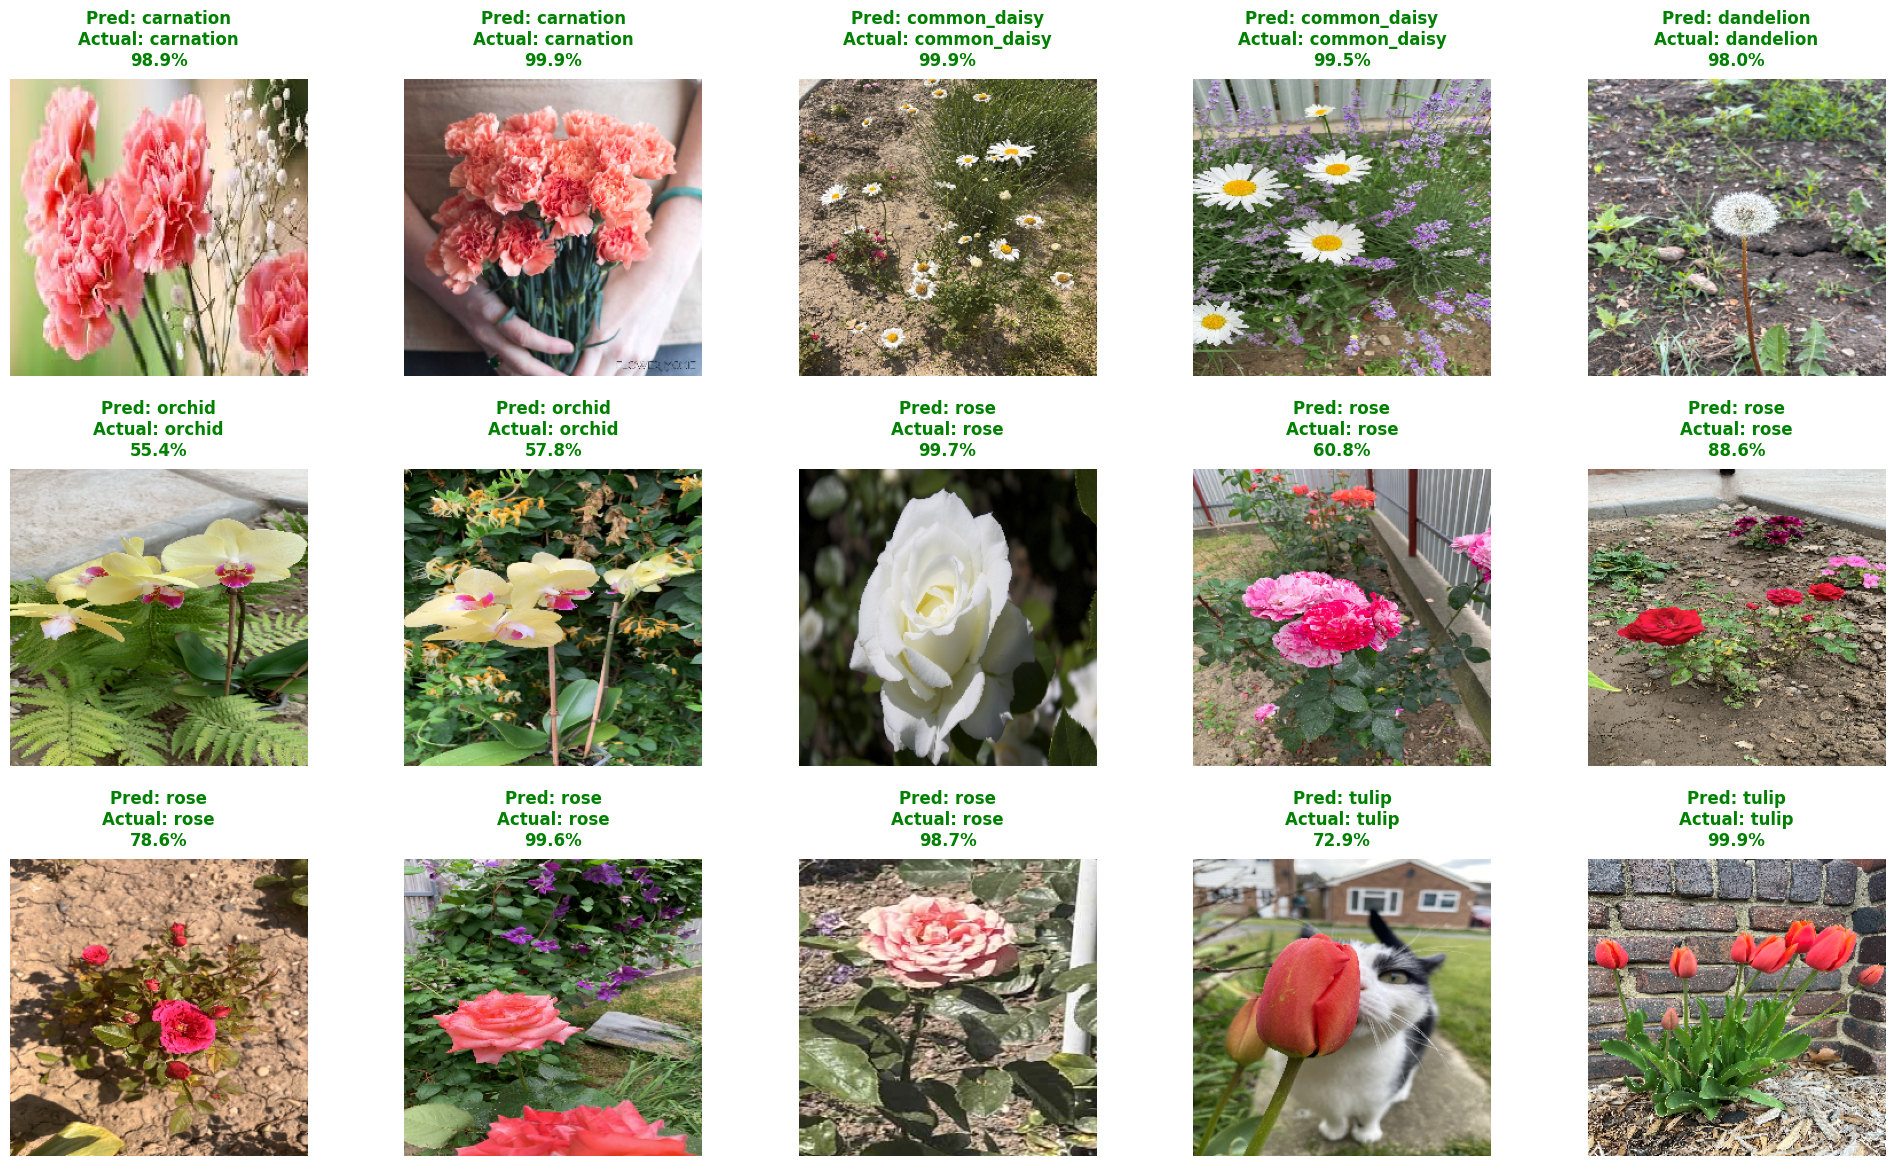

In [75]:
total_images = len(valid_paths)
cols = 5
rows = 3

fig, axes = plt.subplots(rows, cols, figsize=(20, 12))

for i in range(total_images):
    row = i // cols
    col = i % cols
    
    img = processed_images[i]
    img_path = valid_paths[i]
    predicted_idx = predictions[i]
    true_idx_dataset = valid_labels[i]
    confidence = prediction_probabilities[i][predicted_idx]
    
    predicted_class = class_labels_from_json[predicted_idx]
    
    true_idx_model = dataset_to_model_map[true_idx_dataset]
    true_class = class_labels_from_json[true_idx_model]
    
    axes[row, col].imshow(img)
    axes[row, col].axis('off')
    
    color = 'green' if predicted_idx == true_idx_model else 'red'
    
    title_text = f"Pred: {predicted_class}\nActual: {true_class}\n{confidence:.1%}"
    
    axes[row, col].set_title(title_text, fontsize=12, color=color, pad=10, weight='bold')

for i in range(total_images, rows * cols):
    row = i // cols
    col = i % cols
    axes[row, col].axis('off')

plt.tight_layout(pad=2.0)

plt.show()